In [1]:
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import numpy as np
import corner
from copy import deepcopy
from matplotlib import gridspec
import glob

from scipy.stats import dirichlet

In [2]:
flow_filename = '/data/wiay/2297403c/amaze_model_select/AMAZE_model_selection/rns/Flows_230824_oldpriorrange/output_seed12.hdf5'
flow_file = h5py.File(flow_filename, 'r')

chi_b = [0.,0.1,0.2,0.5]
alpha = [0.2,0.5,1.,2.,5.]

Text(0, 0.5, 'p($\\chi_{\\mathrm{b}}$)')

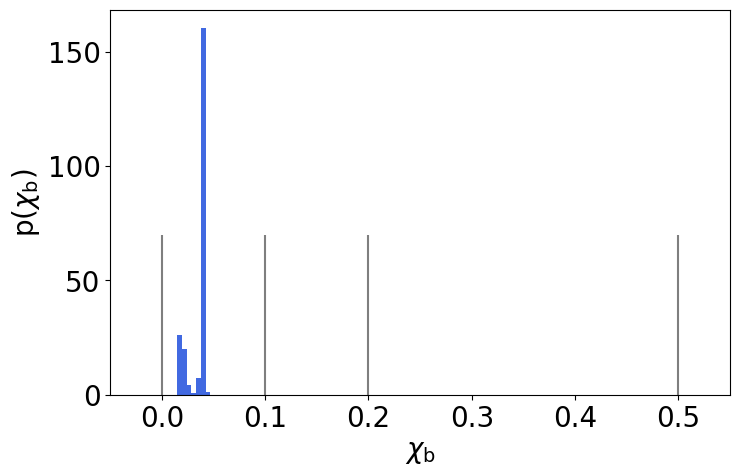

In [3]:
#relative samples in each chi_b
#relative samples in each alpha
plt.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(8,5))
chib_samps = list(flow_file['model_selection']['samples']['block0_values'][:,0])

plt.hist(chib_samps, density=True, label='flow', color='royalblue', bins=18)
for x in chi_b:
    plt.vlines(x, 0, 70, color='black', alpha=0.5)
#plt.ylim(0,70)
plt.xlim(-0.05,.55)
label = '$\chi_{\mathrm{b}}$'
plt.xlabel(r'$\chi_{\mathrm{b}}$')
plt.ylabel(r'p($\chi_{\mathrm{b}}$)')
#plt.savefig('/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/rns/Flows_140224_regularisation/plots/alpha_flow_KDEcomp.pdf')
#plt.savefig('/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/rns/Flows_140224_regularisation/plots/chib_flow_KDEcomp.pdf')

In [4]:
np.mean(chib_samps)

0.03513823695604082

Text(0, 0.5, 'p($\\alpha_{\\mathrm{CE}}$)')

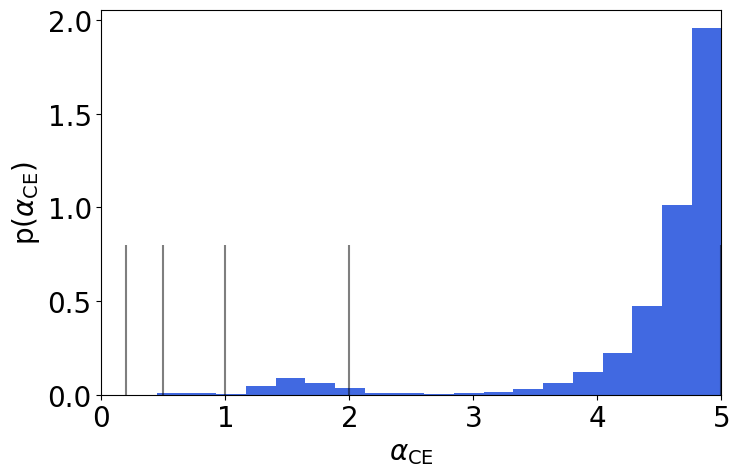

In [5]:
#relative samples in each alpha
plt.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(8,5))

alpha_samps = list(flow_file['model_selection']['samples']['block0_values'][:,1])

plt.hist(alpha_samps, density=True, label='flow', color='royalblue', bins=20)
for a in alpha:
    plt.vlines(a, 0, 0.8, color='black', alpha=0.5)
#plt.ylim(0,0.8)
plt.xlim(0,5)
label = '$\alpha_{\mathrm{CE}}$'
plt.xlabel(r'$\alpha_{\mathrm{CE}}$')
plt.ylabel(r'p($\alpha_{\mathrm{CE}}$)')
#plt.savefig('/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/rns/Flows_140224_regularisation/plots/alpha_flow_KDEcomp.pdf')

In [9]:
np.mean(alpha_samps)

4.010354551706366

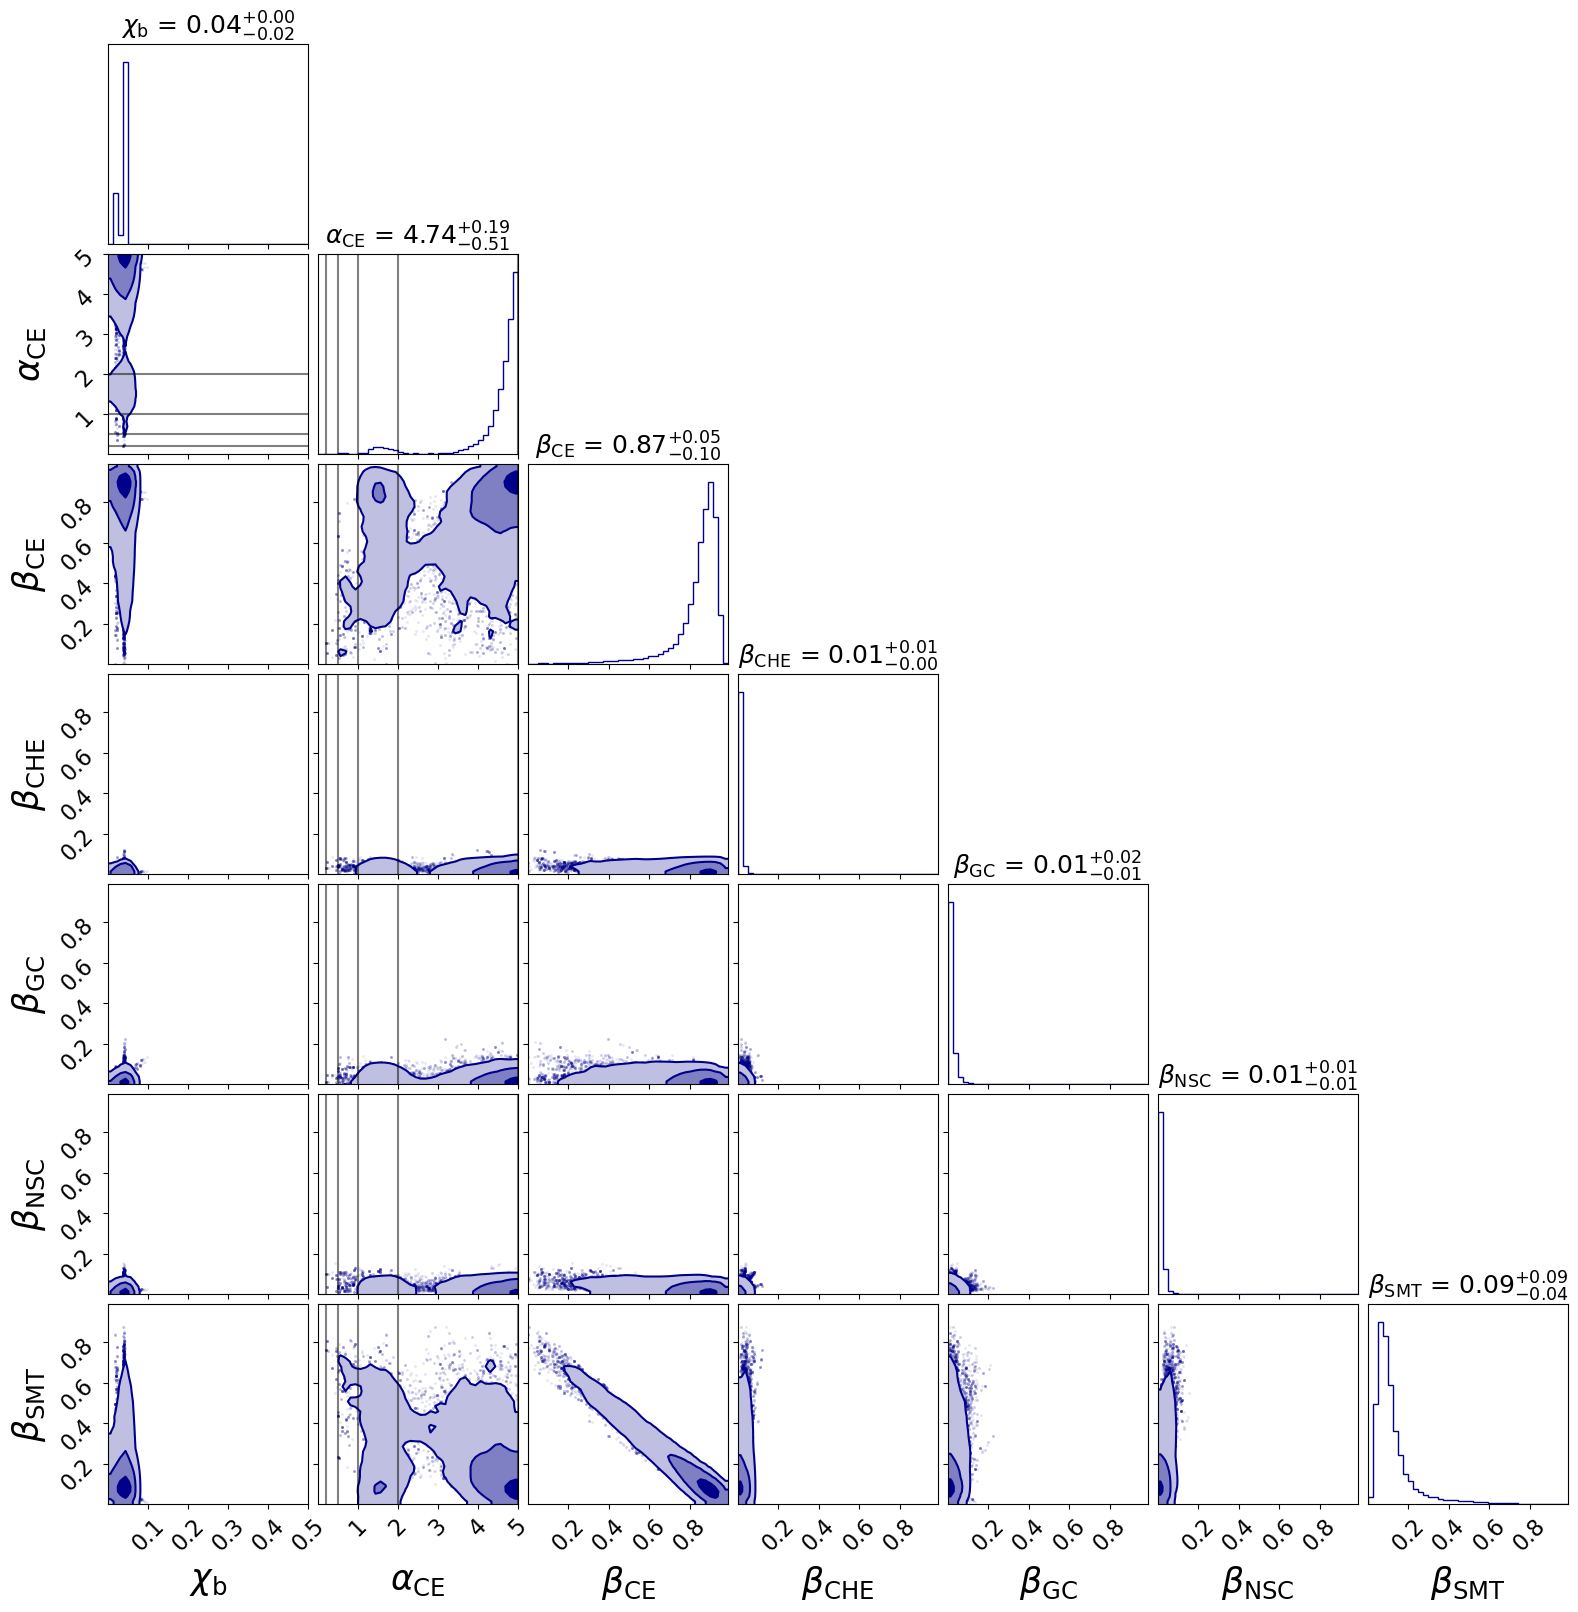

In [6]:
#corner plots of betas
plt.rcParams.update({'font.size': 16})


corner_kwargs = dict(
    bins=40,
    smooth=0.9,
    color="darkblue",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=True,
    hist_kwargs=dict(density=True),
    label_kwargs=dict(fontsize=25),
    title_kwargs=dict(fontsize=18),
    labels=[r'$\chi_\mathrm{b}$', r'$\alpha_{\mathrm{CE}}$',r'$\beta_{\mathrm{CE}}$',r'$\beta_{\mathrm{CHE}}$',r'$\beta_{\mathrm{GC}}$',r'$\beta_{\mathrm{NSC}}$',r'$\beta_{\mathrm{SMT}}$'],
    range = [(0.,.5),(0.,5.),(0.,.99),(0.,.99),(0.,.99),(0.,.99),(0.,.99)]
)

branching_fracs = np.array(flow_file['model_selection']['samples']['block0_values'])
fig_data = corner.corner(branching_fracs, **corner_kwargs)

for a in alpha:
    corner.overplot_lines(fig_data, [None, a, None, None, None, None, None], color='black', alpha=0.5)
#fig_data = corner.corner(dirichlet.pdf(np.ones(5)*0.2, np.ones(5)), fig=fig_data, **corner_kwargs_kde)
#fig_data.savefig('/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/rns/Flows_200324_contcorrectalpha/plots/full_posteriors_corner_cont.pdf')

In [7]:
glob.glob('/data/wiay/2297403c/amaze_model_select/AMAZE_model_selection/rns/Flows_230824_oldpriorrange/*_highreg.hdf5')

['/data/wiay/2297403c/amaze_model_select/AMAZE_model_selection/rns/Flows_230824_oldpriorrange/output_highreg.hdf5',
 '/data/wiay/2297403c/amaze_model_select/AMAZE_model_selection/rns/Flows_230824_oldpriorrange/output_seed89_highreg.hdf5',
 '/data/wiay/2297403c/amaze_model_select/AMAZE_model_selection/rns/Flows_230824_oldpriorrange/output_seed12_highreg.hdf5',
 '/data/wiay/2297403c/amaze_model_select/AMAZE_model_selection/rns/Flows_230824_oldpriorrange/output_seed314_highreg.hdf5']

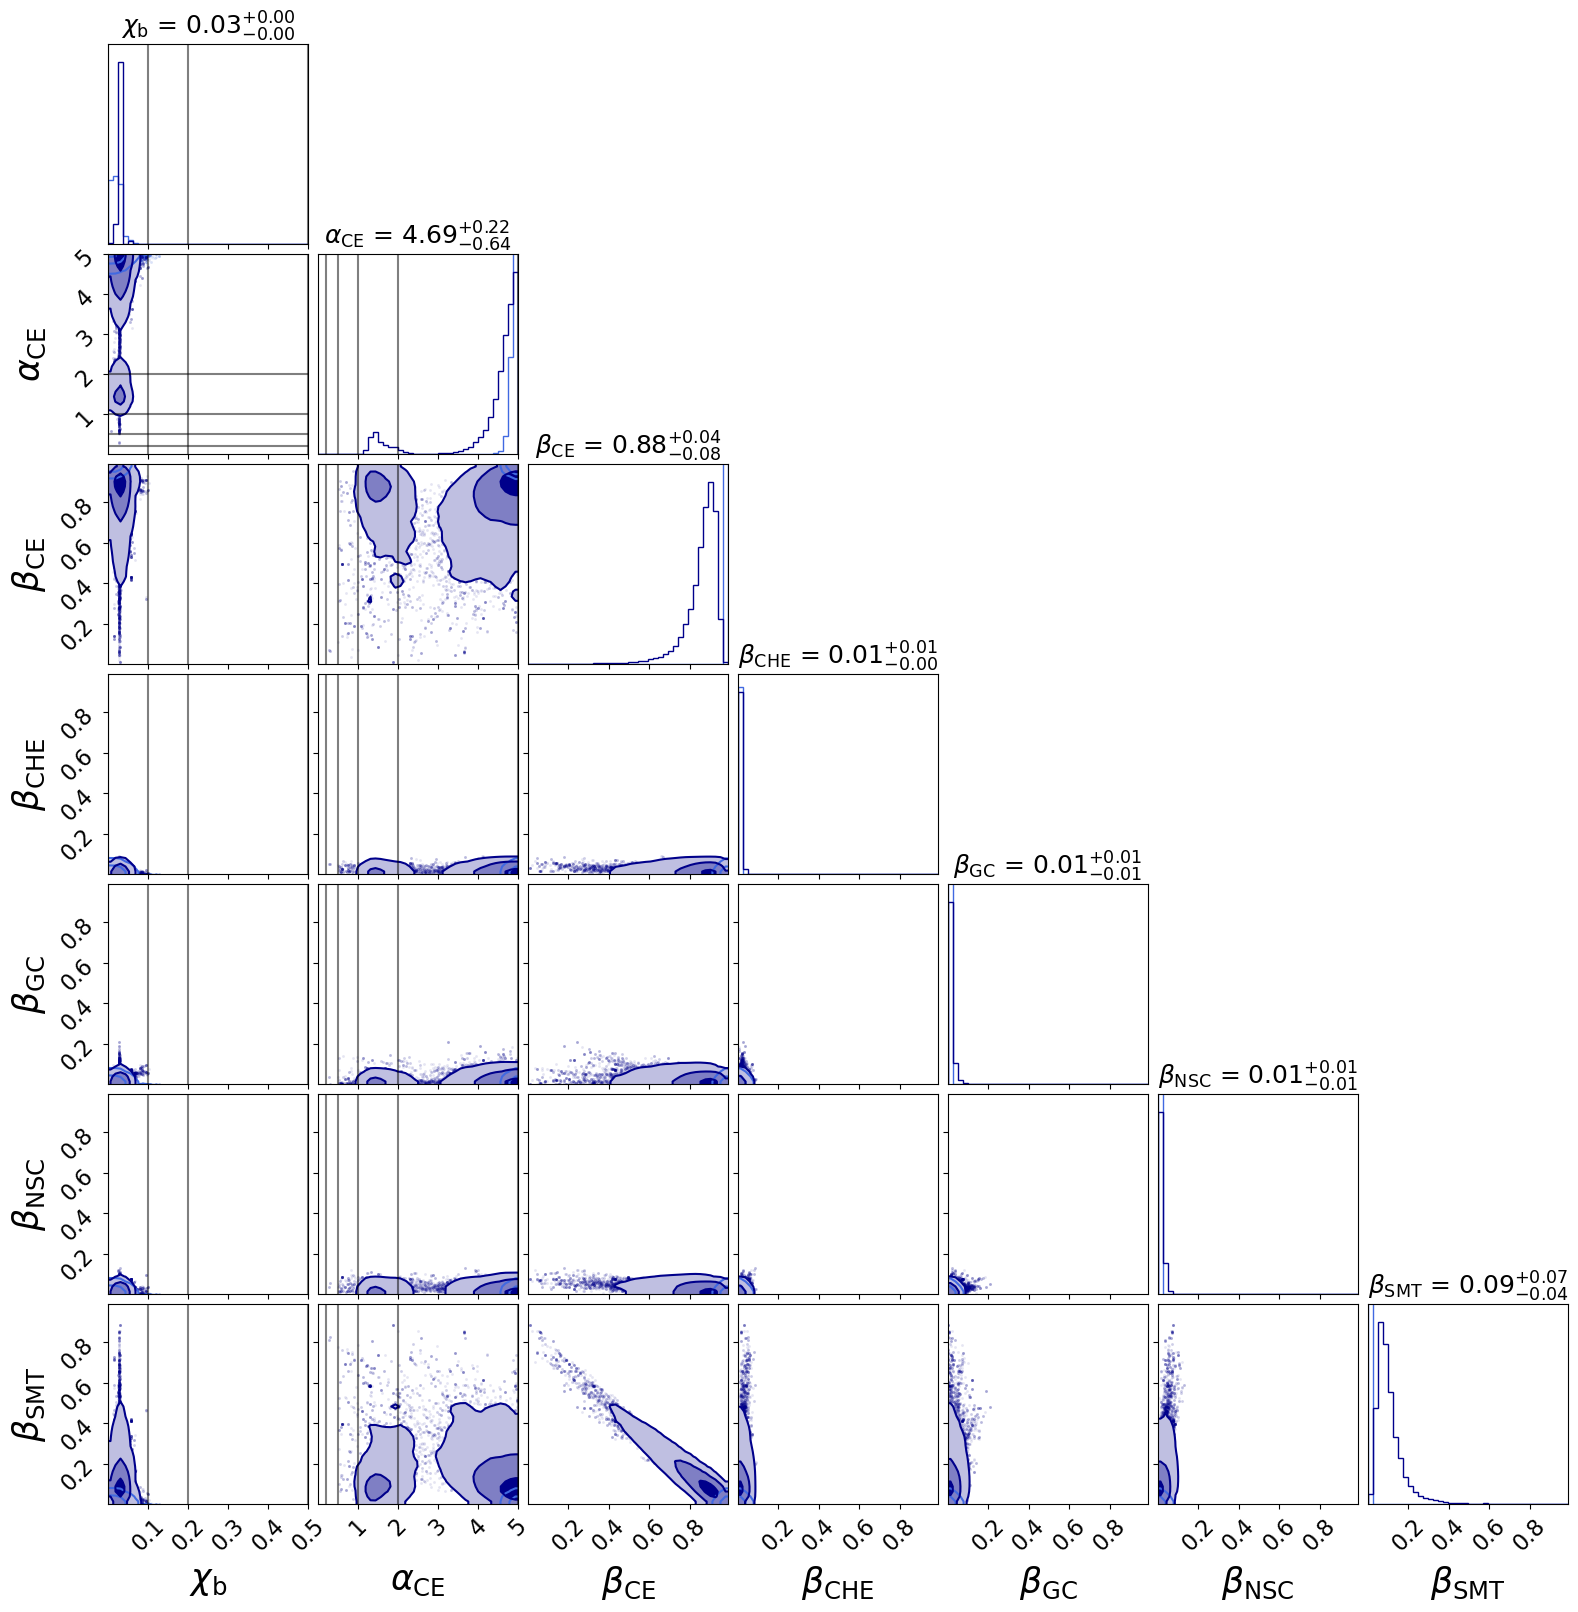

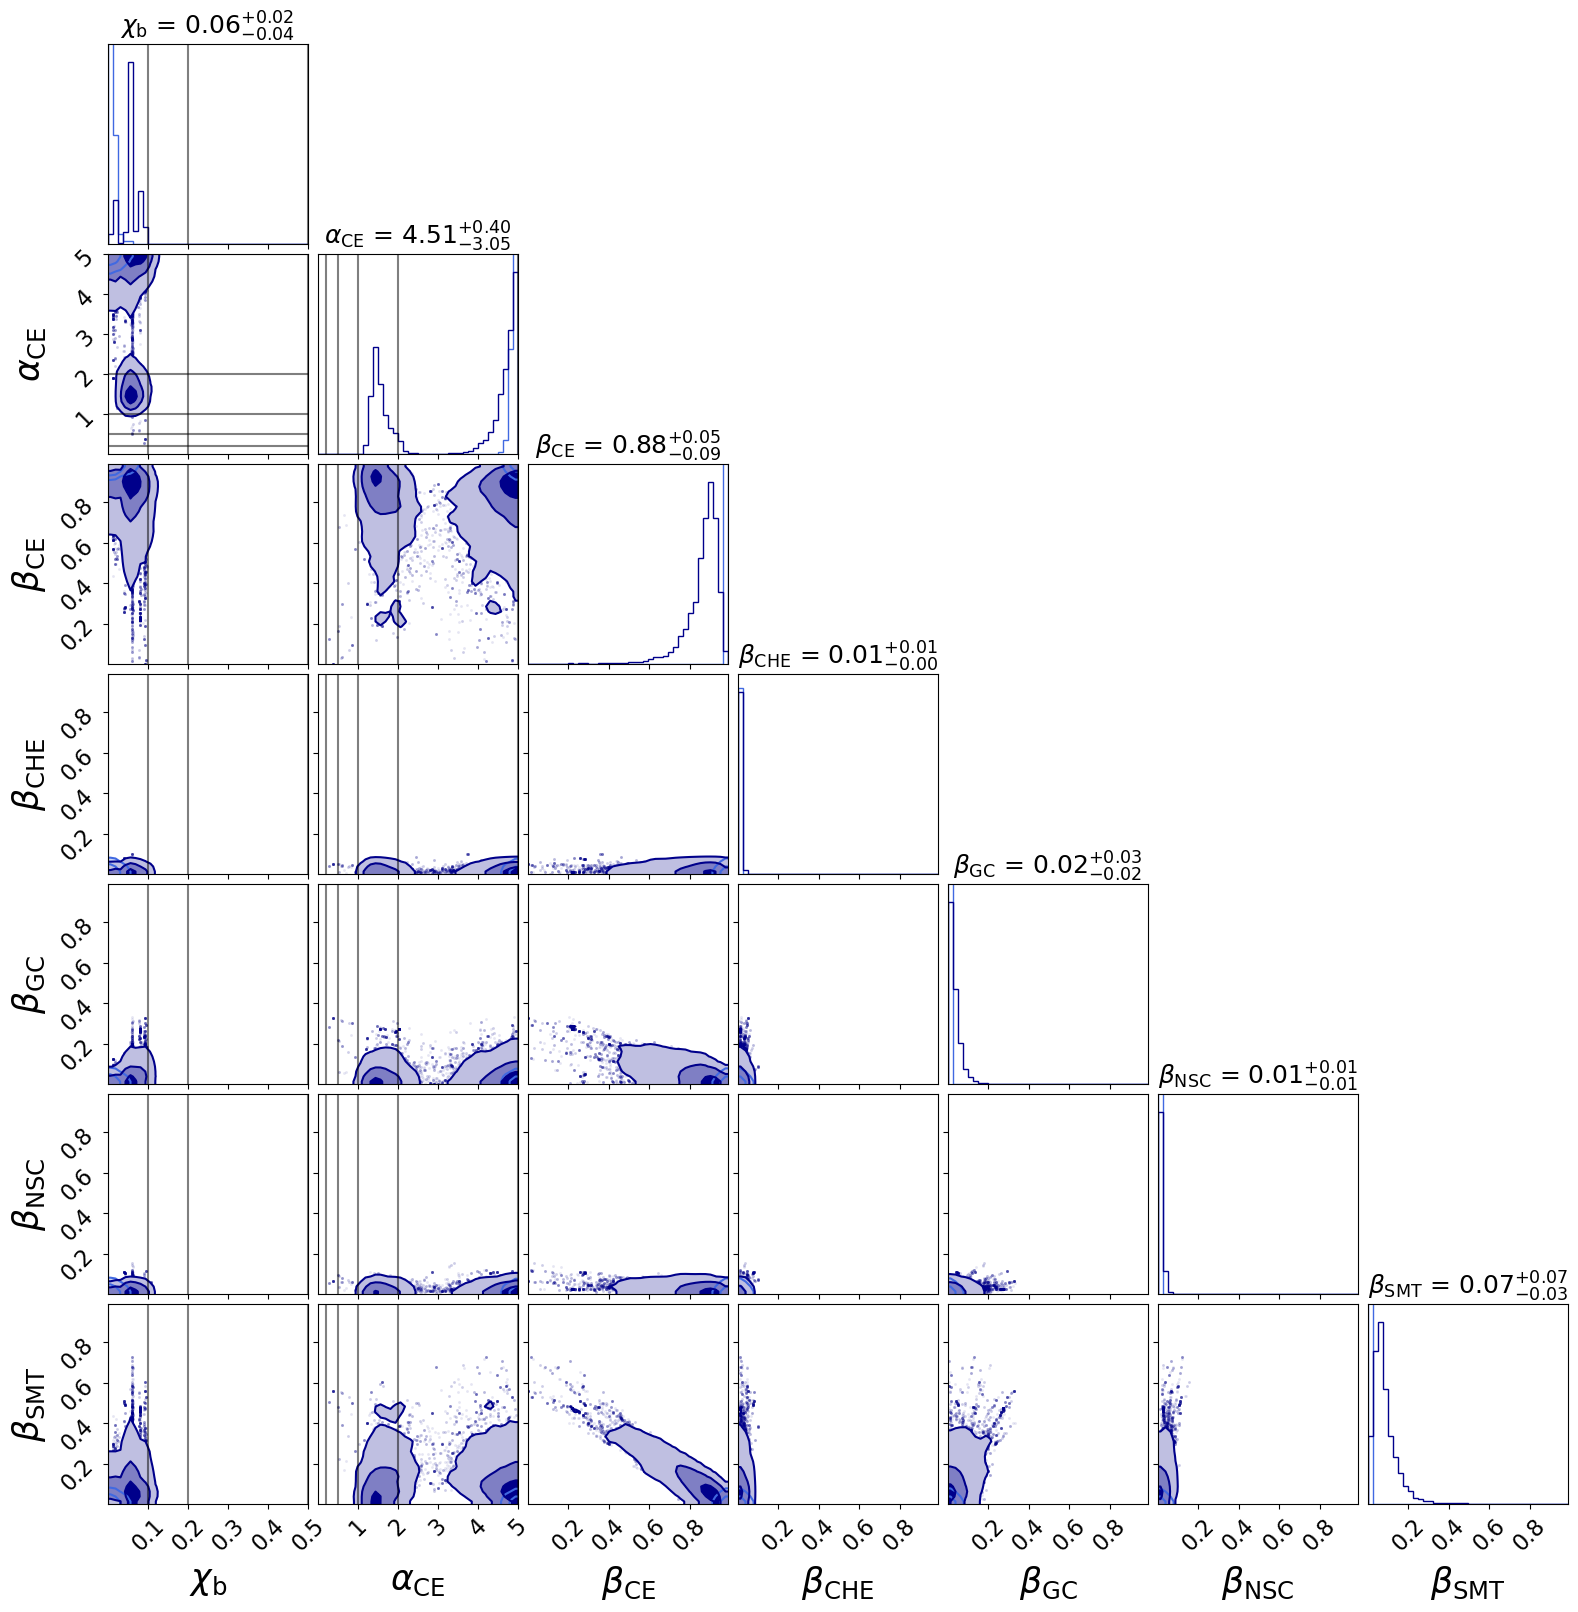

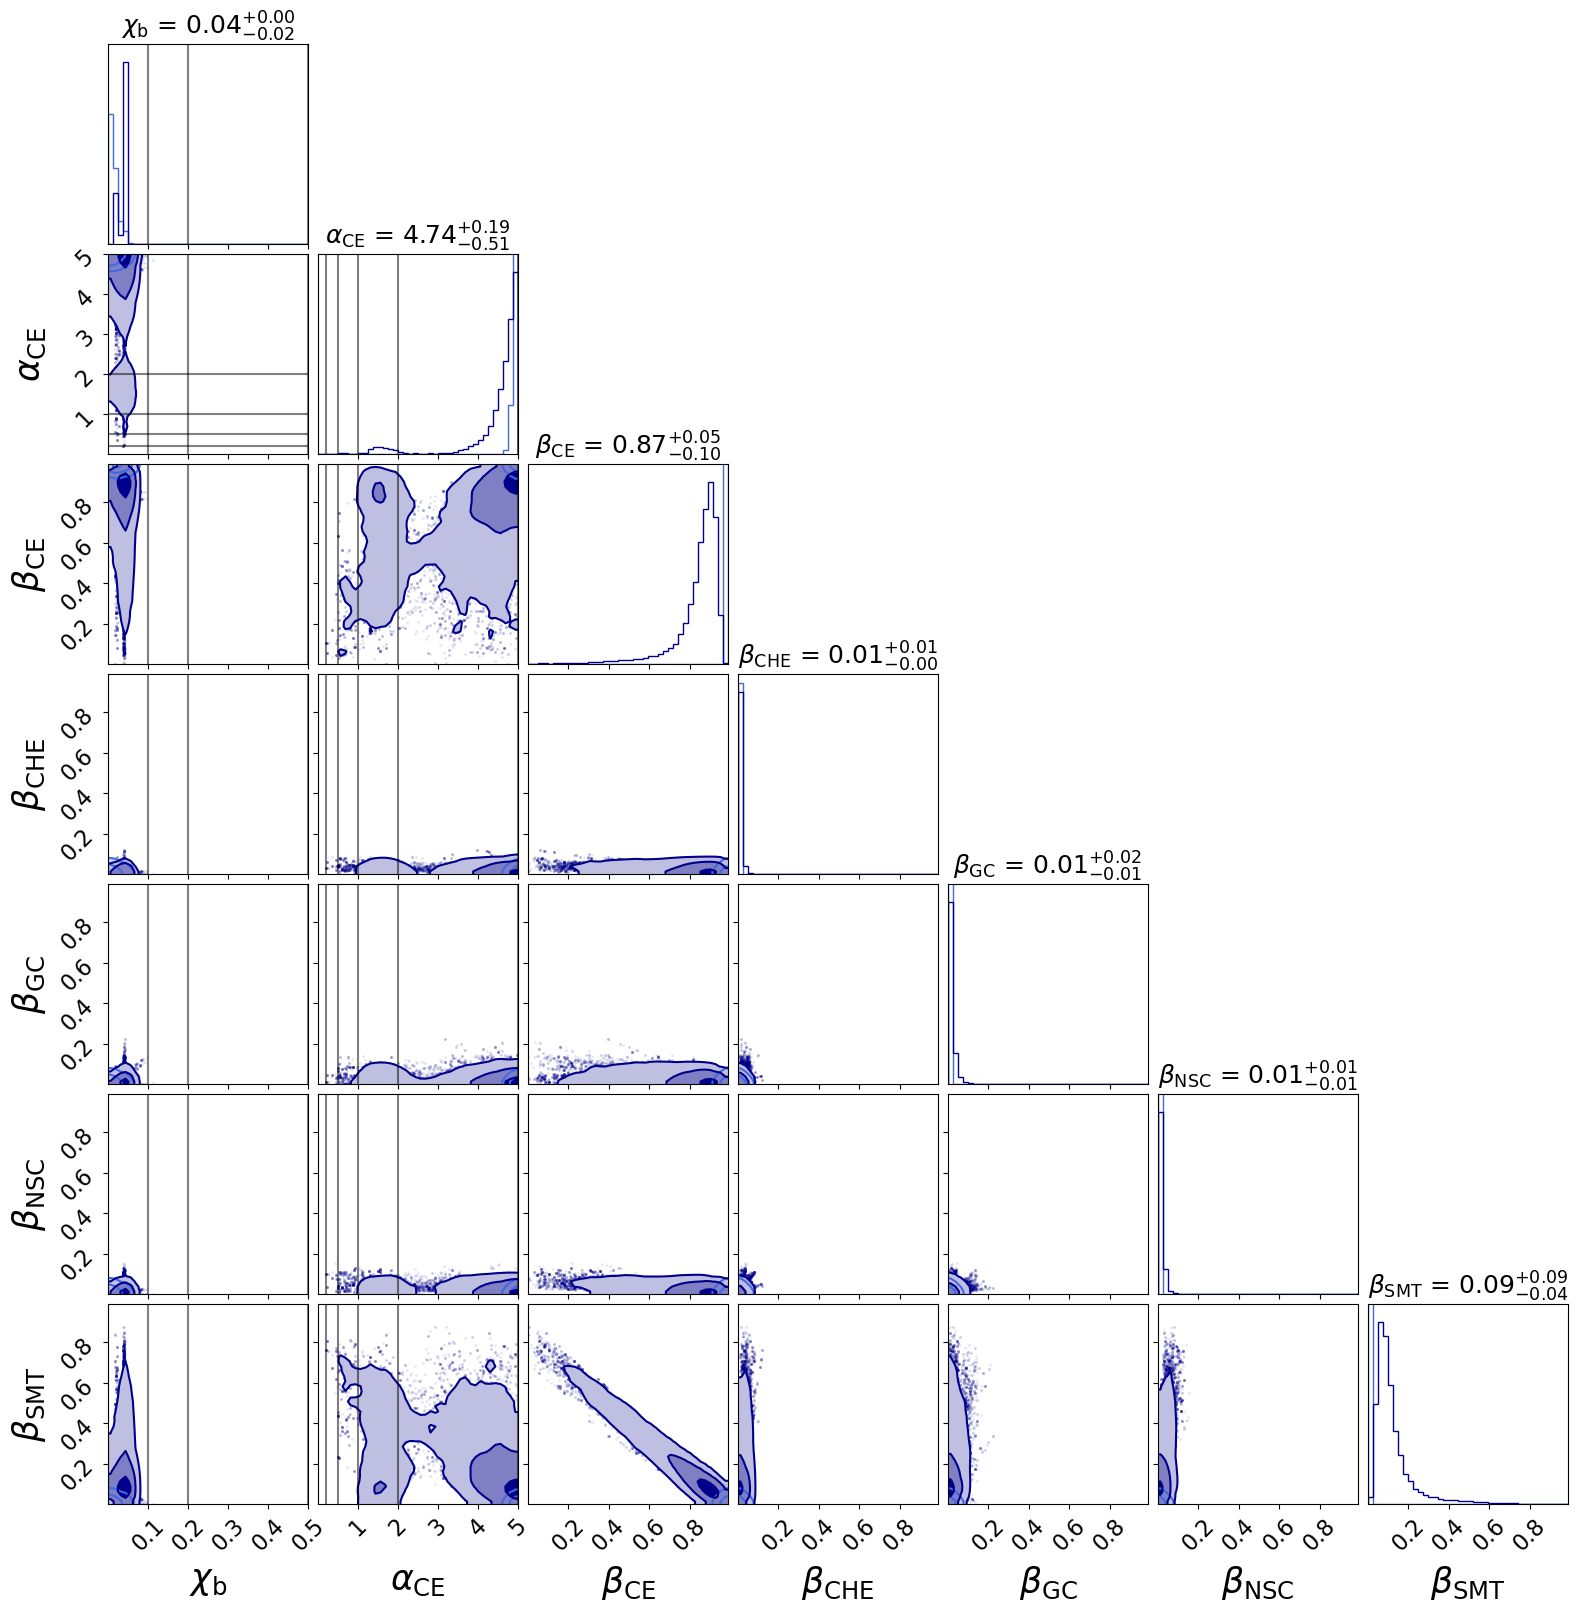

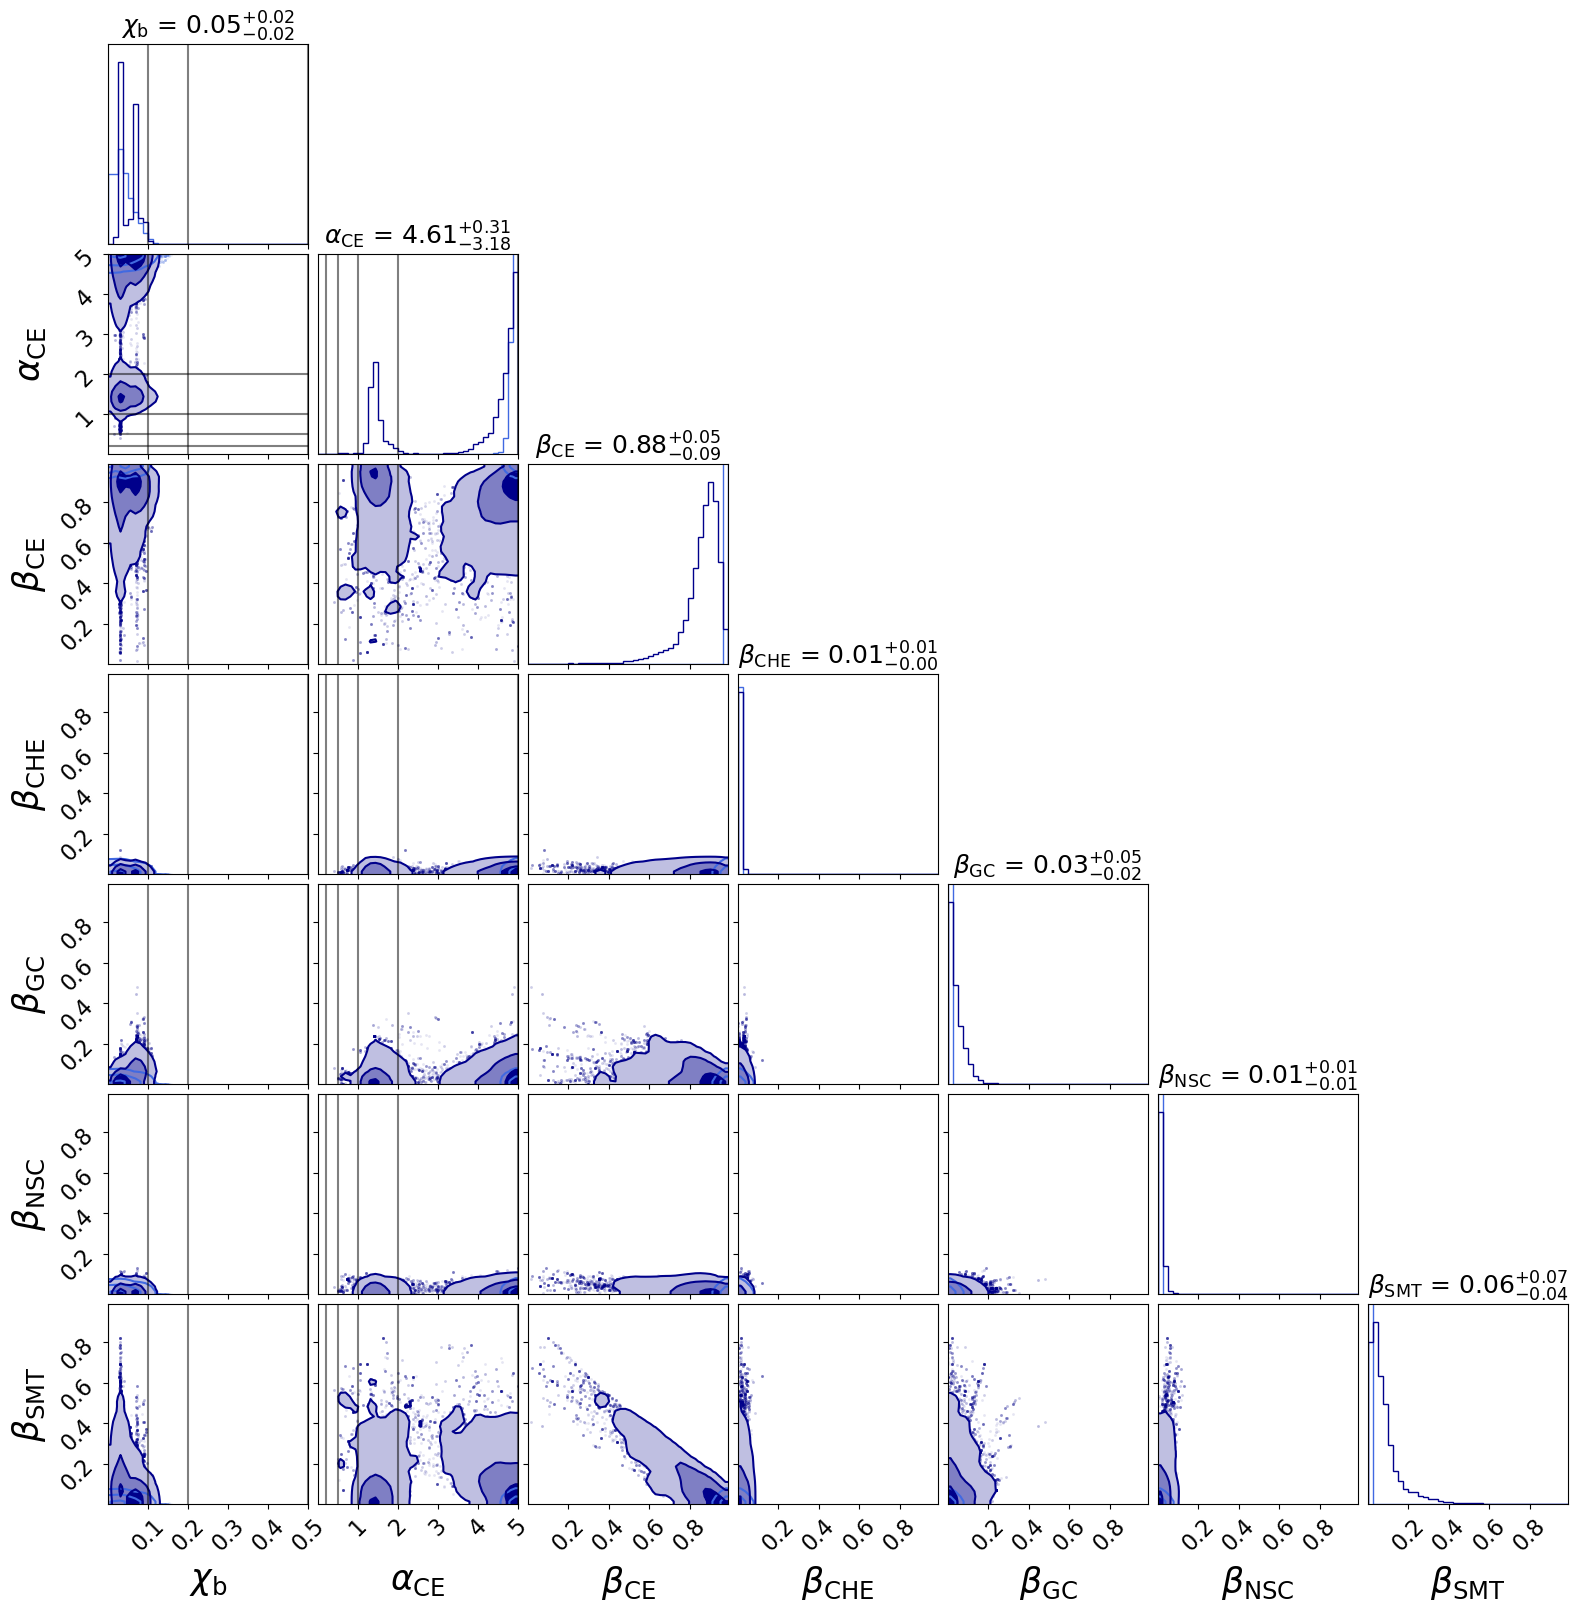

In [8]:
#corner plots of betas
plt.rcParams.update({'font.size': 16})


corner_kwargs = dict(
    bins=40,
    smooth=0.9,
    color="royalblue",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=True,
    hist_kwargs=dict(density=True),
    label_kwargs=dict(fontsize=25),
    title_kwargs=dict(fontsize=18),
    labels=[r'$\chi_\mathrm{b}$', r'$\alpha_{\mathrm{CE}}$',r'$\beta_{\mathrm{CE}}$',r'$\beta_{\mathrm{CHE}}$',r'$\beta_{\mathrm{GC}}$',r'$\beta_{\mathrm{NSC}}$',r'$\beta_{\mathrm{SMT}}$'],
    range = [(0.,.5),(0.,5.),(0.,.99),(0.,.99),(0.,.99),(0.,.99),(0.,.99)]
)
kwargs_lowreg = dict(
    bins=40,
    smooth=0.9,
    color="darkblue",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=True,
    hist_kwargs=dict(density=True),
    label_kwargs=dict(fontsize=25),
    title_kwargs=dict(fontsize=18),
    labels=[r'$\chi_\mathrm{b}$', r'$\alpha_{\mathrm{CE}}$',r'$\beta_{\mathrm{CE}}$',r'$\beta_{\mathrm{CHE}}$',r'$\beta_{\mathrm{GC}}$',r'$\beta_{\mathrm{NSC}}$',r'$\beta_{\mathrm{SMT}}$'],
    range = [(0.,.5),(0.,5.),(0.,.99),(0.,.99),(0.,.99),(0.,.99),(0.,.99)]
)


files_lowreg = ['Flows_230824_oldpriorrange/output.hdf5',
 'Flows_230824_oldpriorrange/output_seed89.hdf5',
 'Flows_230824_oldpriorrange/output_seed12.hdf5',
 'Flows_230824_oldpriorrange/output_seed314.hdf5']

for i, filename in enumerate(glob.glob('/data/wiay/2297403c/amaze_model_select/AMAZE_model_selection/rns/Flows_230824_oldpriorrange/*_highreg.hdf5')):

    file = h5py.File(filename, 'r')
    file_lowreg = h5py.File(f'/data/wiay/2297403c/amaze_model_select/AMAZE_model_selection/rns/{files_lowreg[i]}', 'r')
    branching_fracs = np.array(file['model_selection']['samples']['block0_values'])
    fig_seed = corner.corner(branching_fracs, **corner_kwargs)

    branching_fracs_lowreg = np.array(file_lowreg['model_selection']['samples']['block0_values'])
    corner.corner(branching_fracs_lowreg, fig=fig_seed, **kwargs_lowreg)

    for xb in chi_b:
        corner.overplot_lines(fig_seed, [xb, None, None, None, None, None, None], color='black', alpha=0.5)

    for a in alpha:
        corner.overplot_lines(fig_seed, [None, a, None, None, None, None, None], color='black', alpha=0.5)

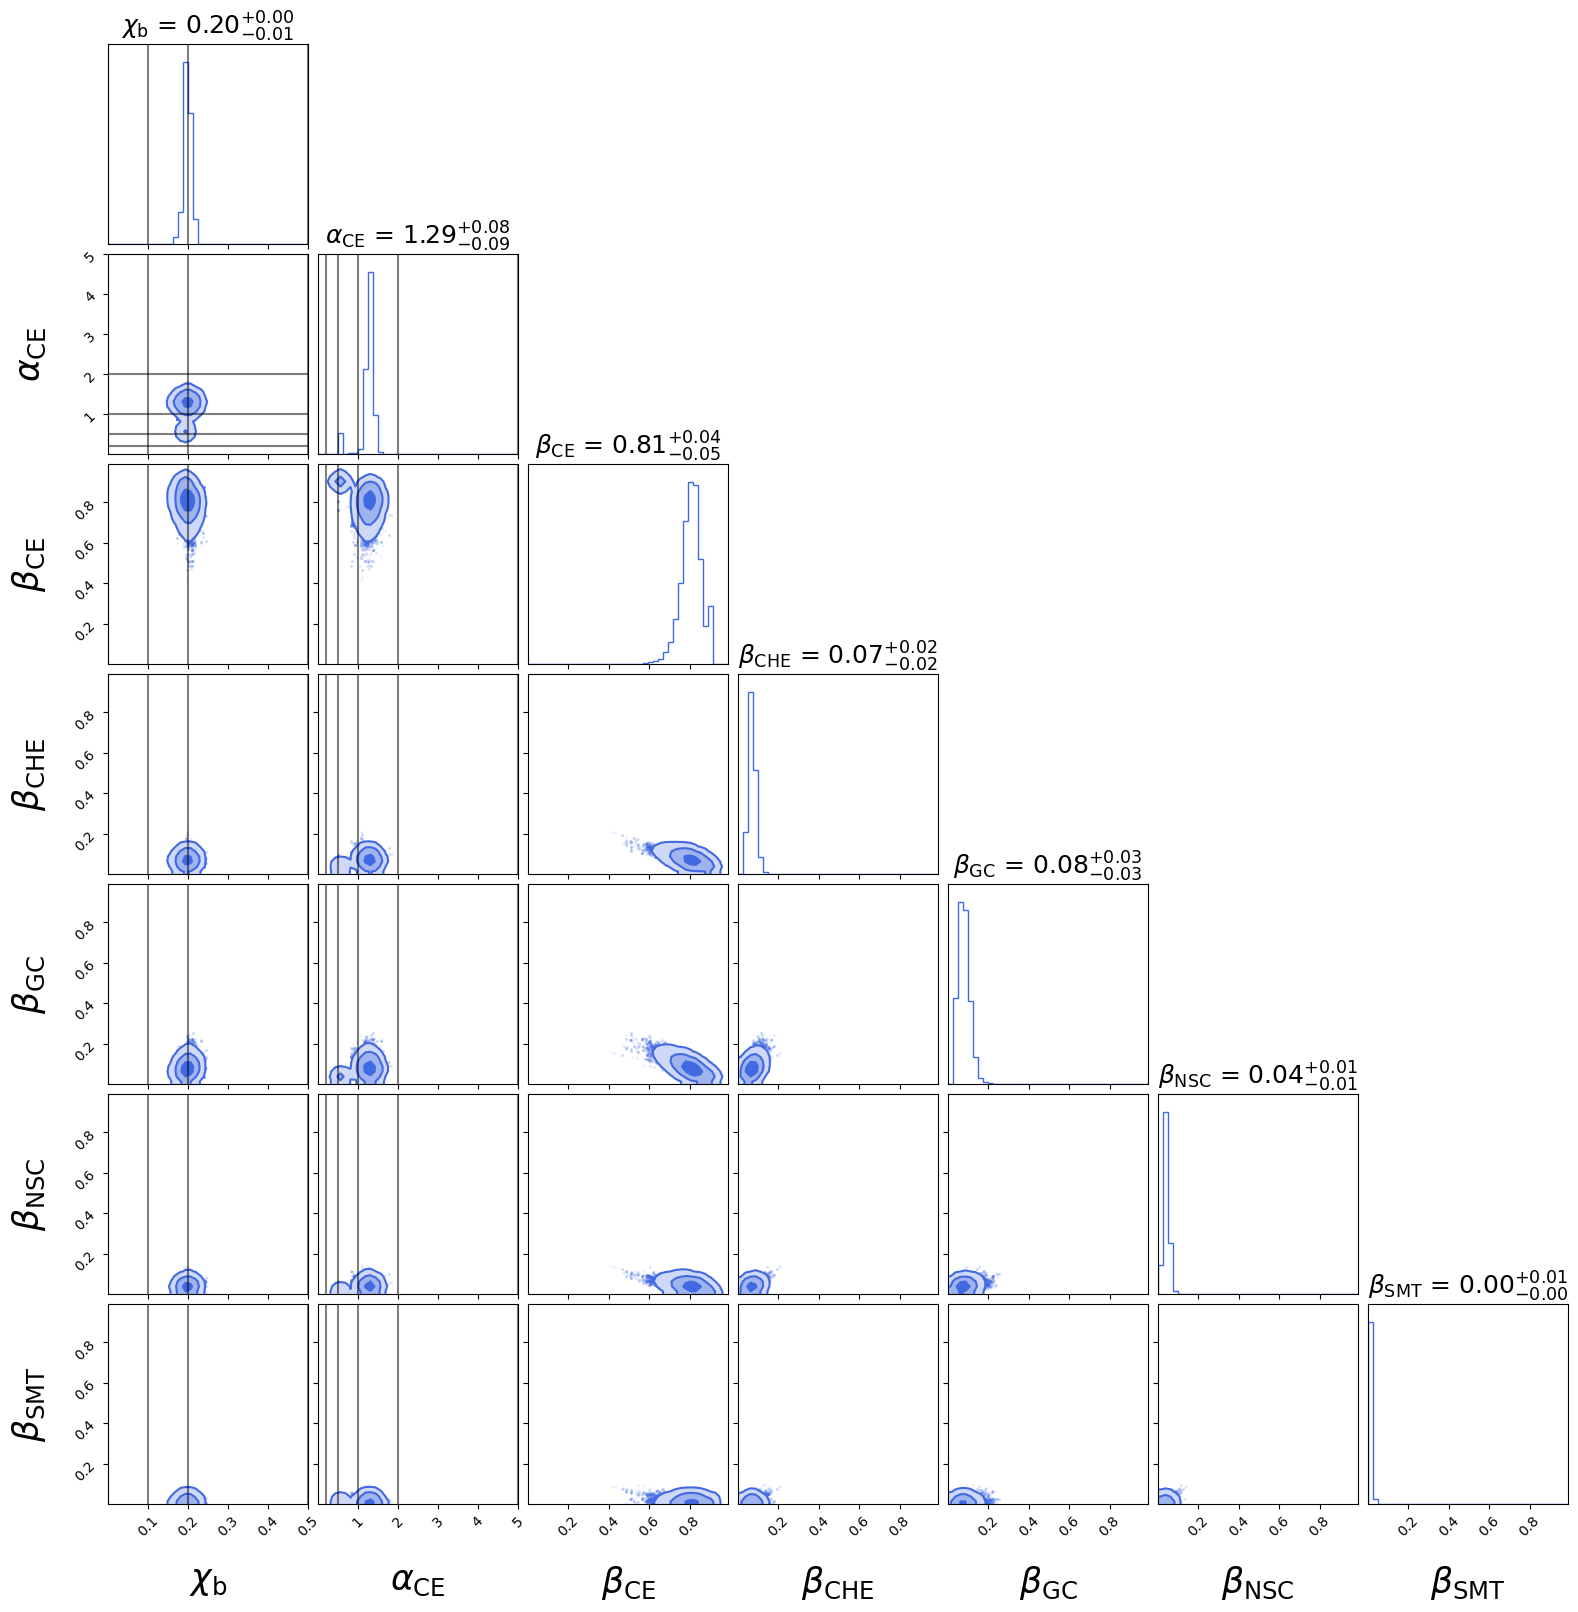

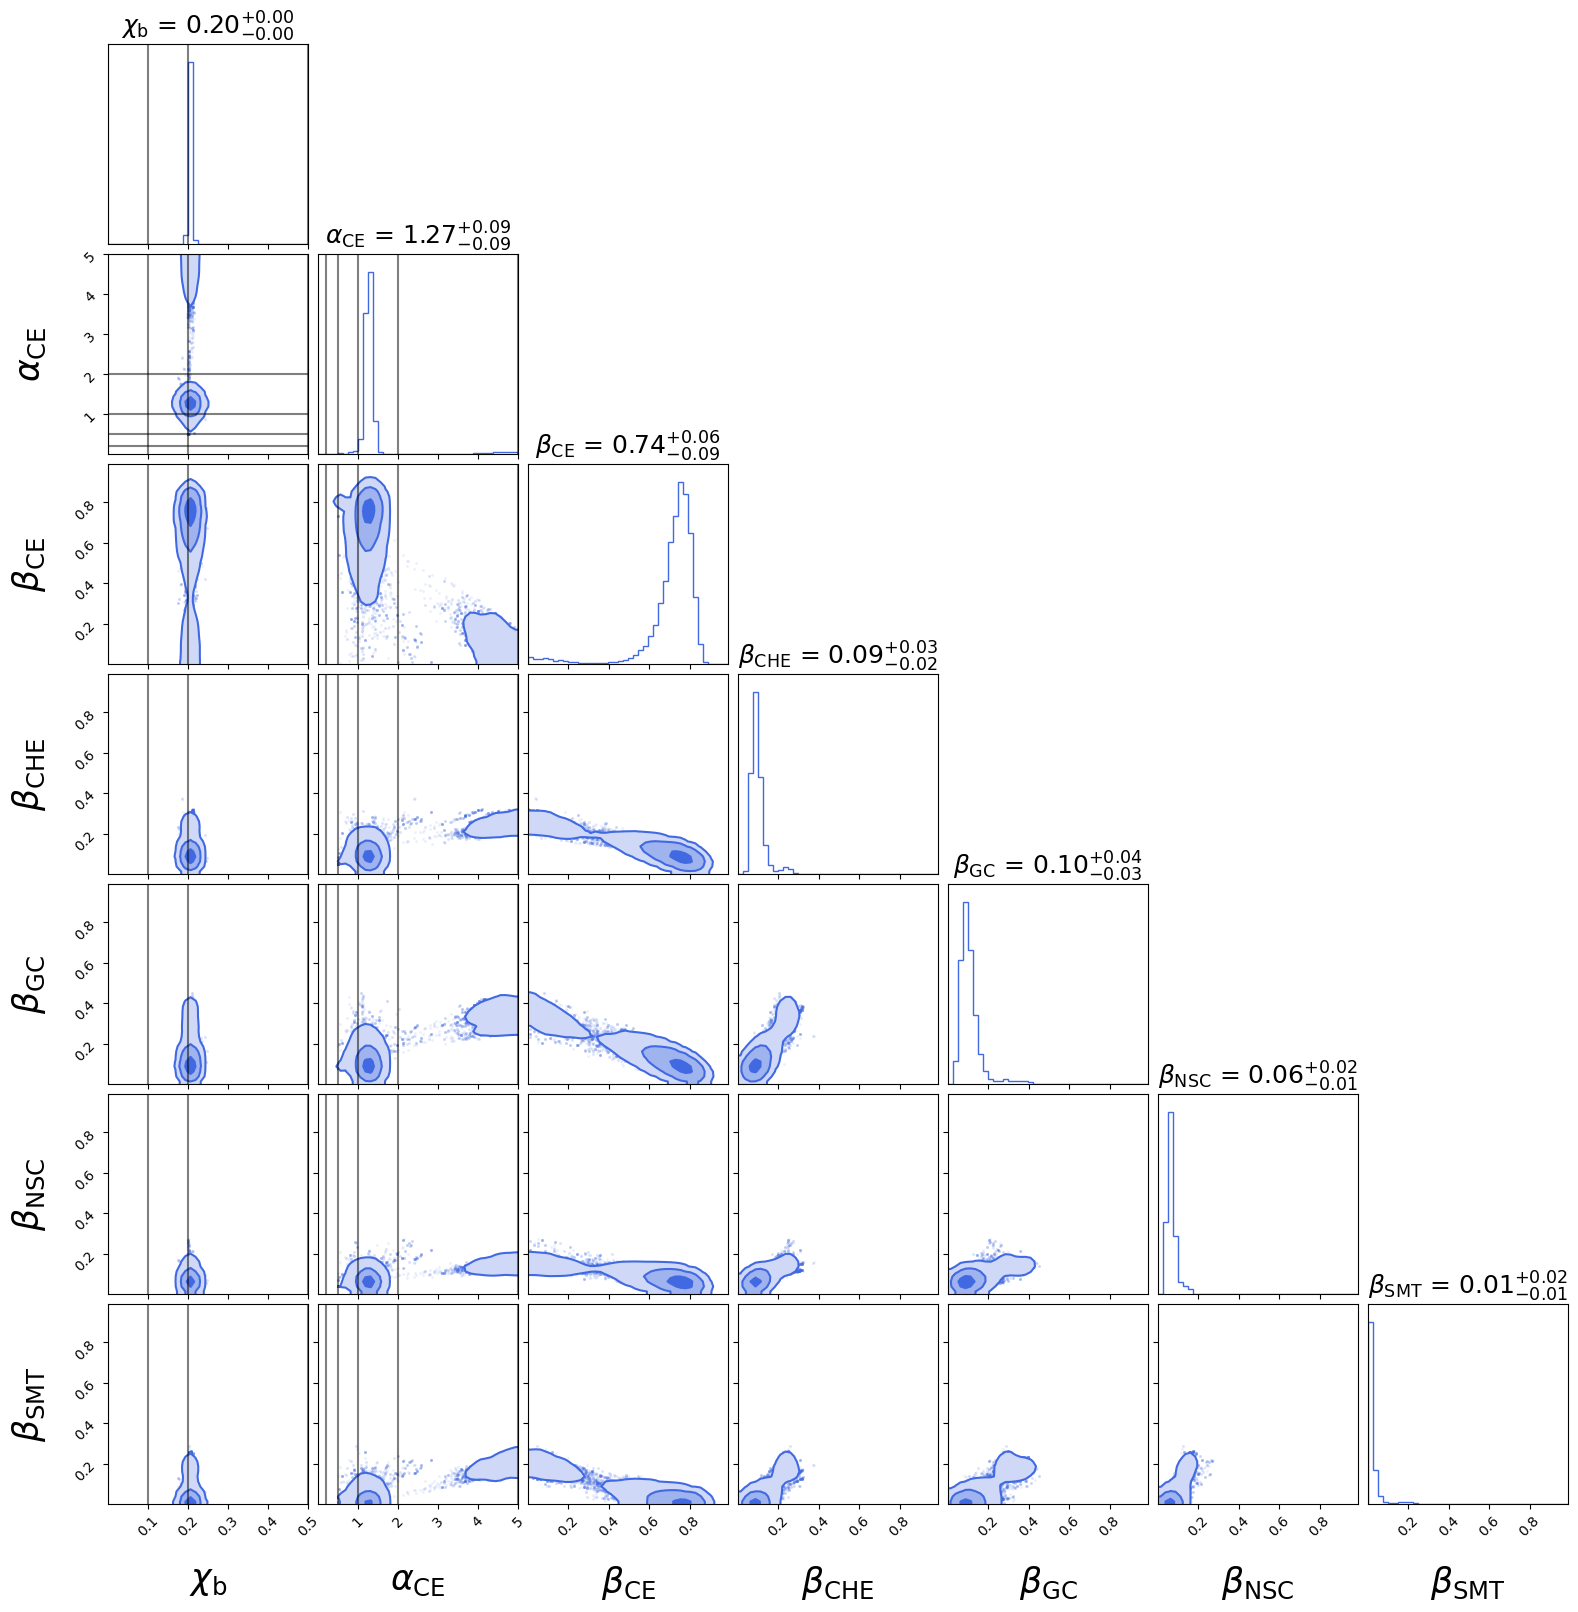

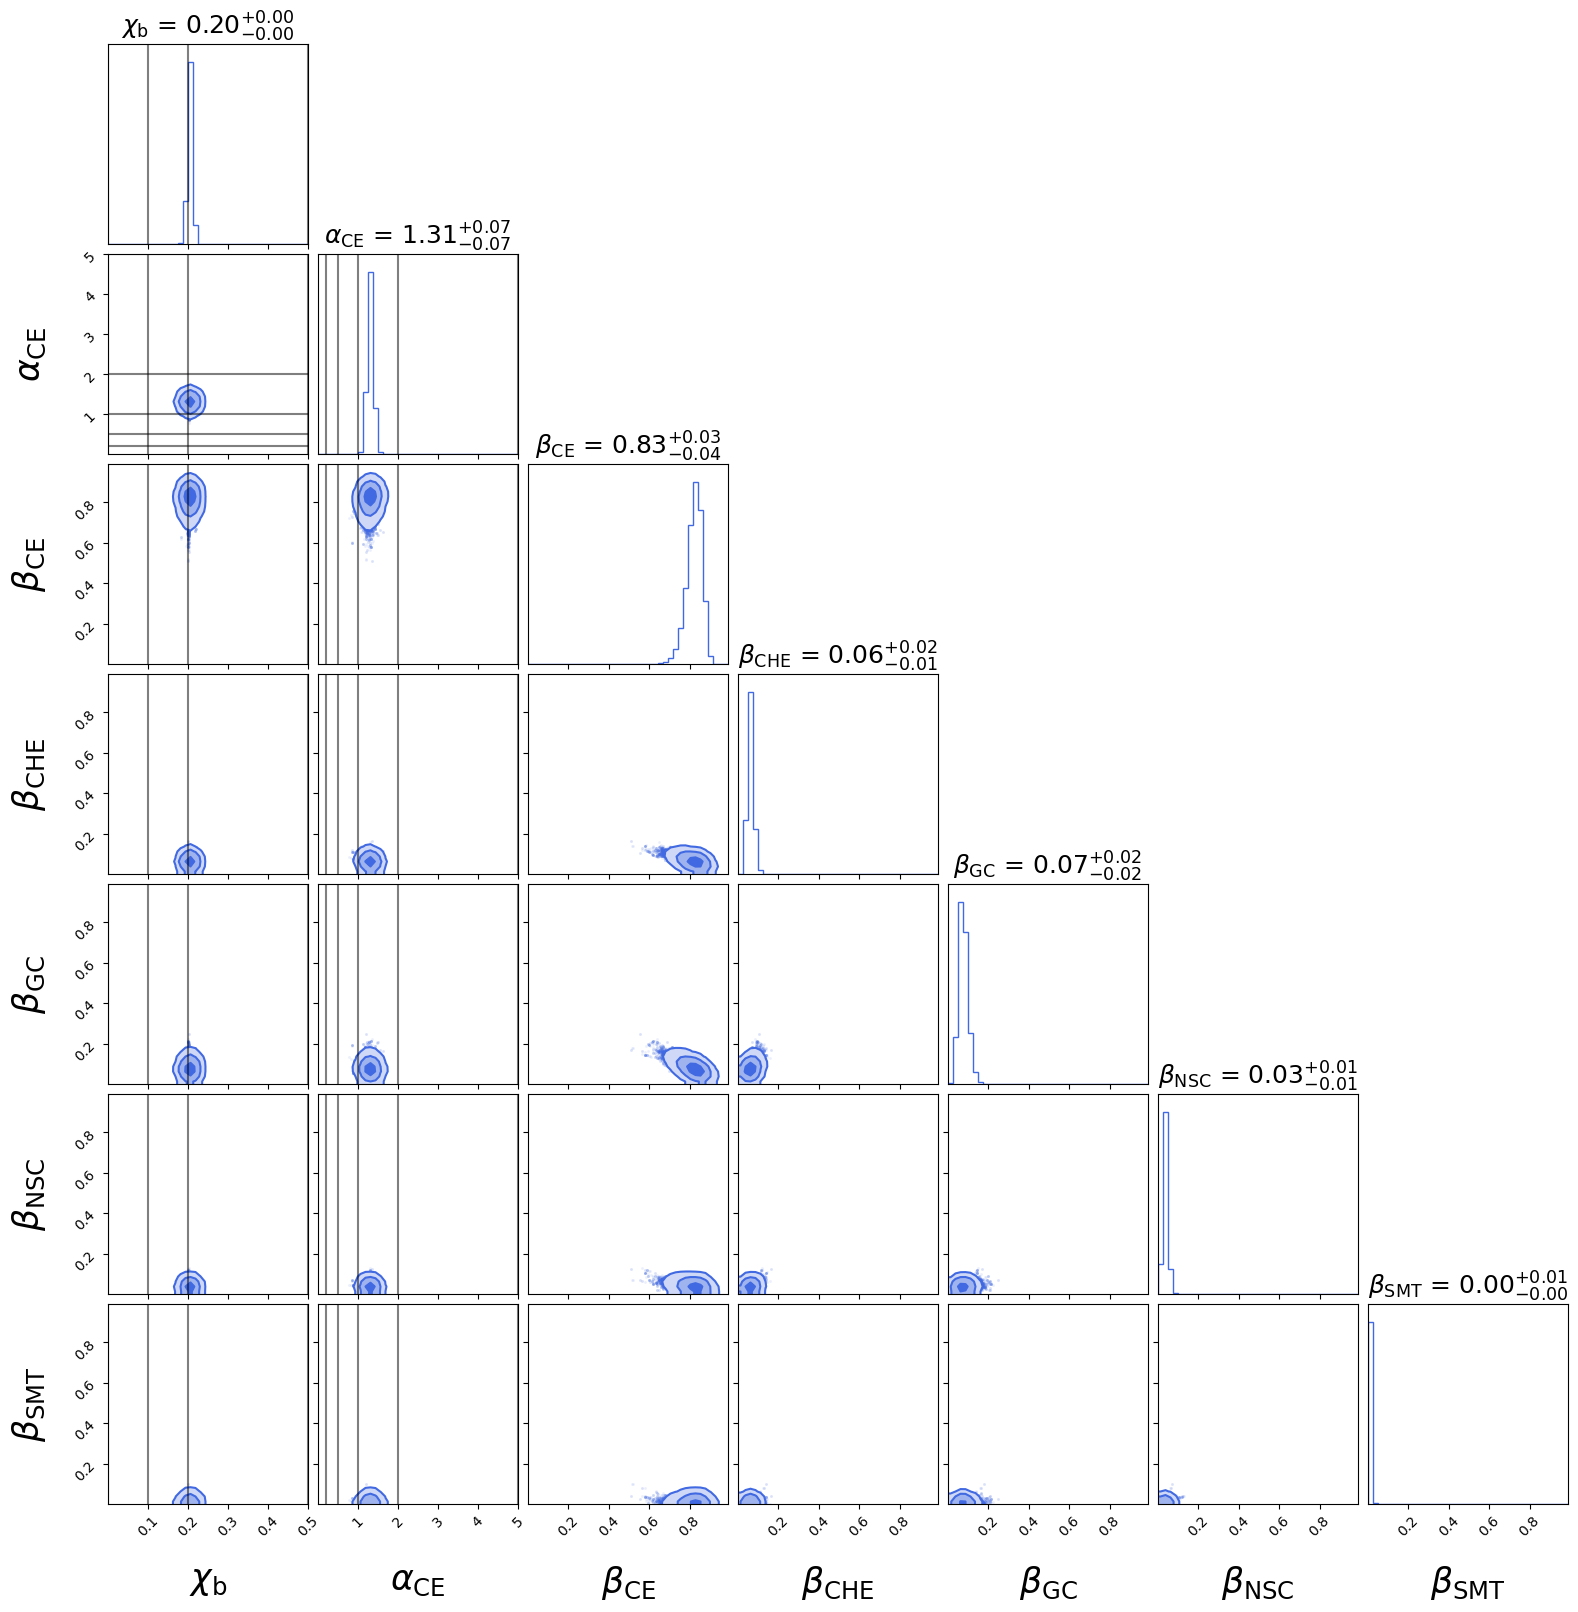

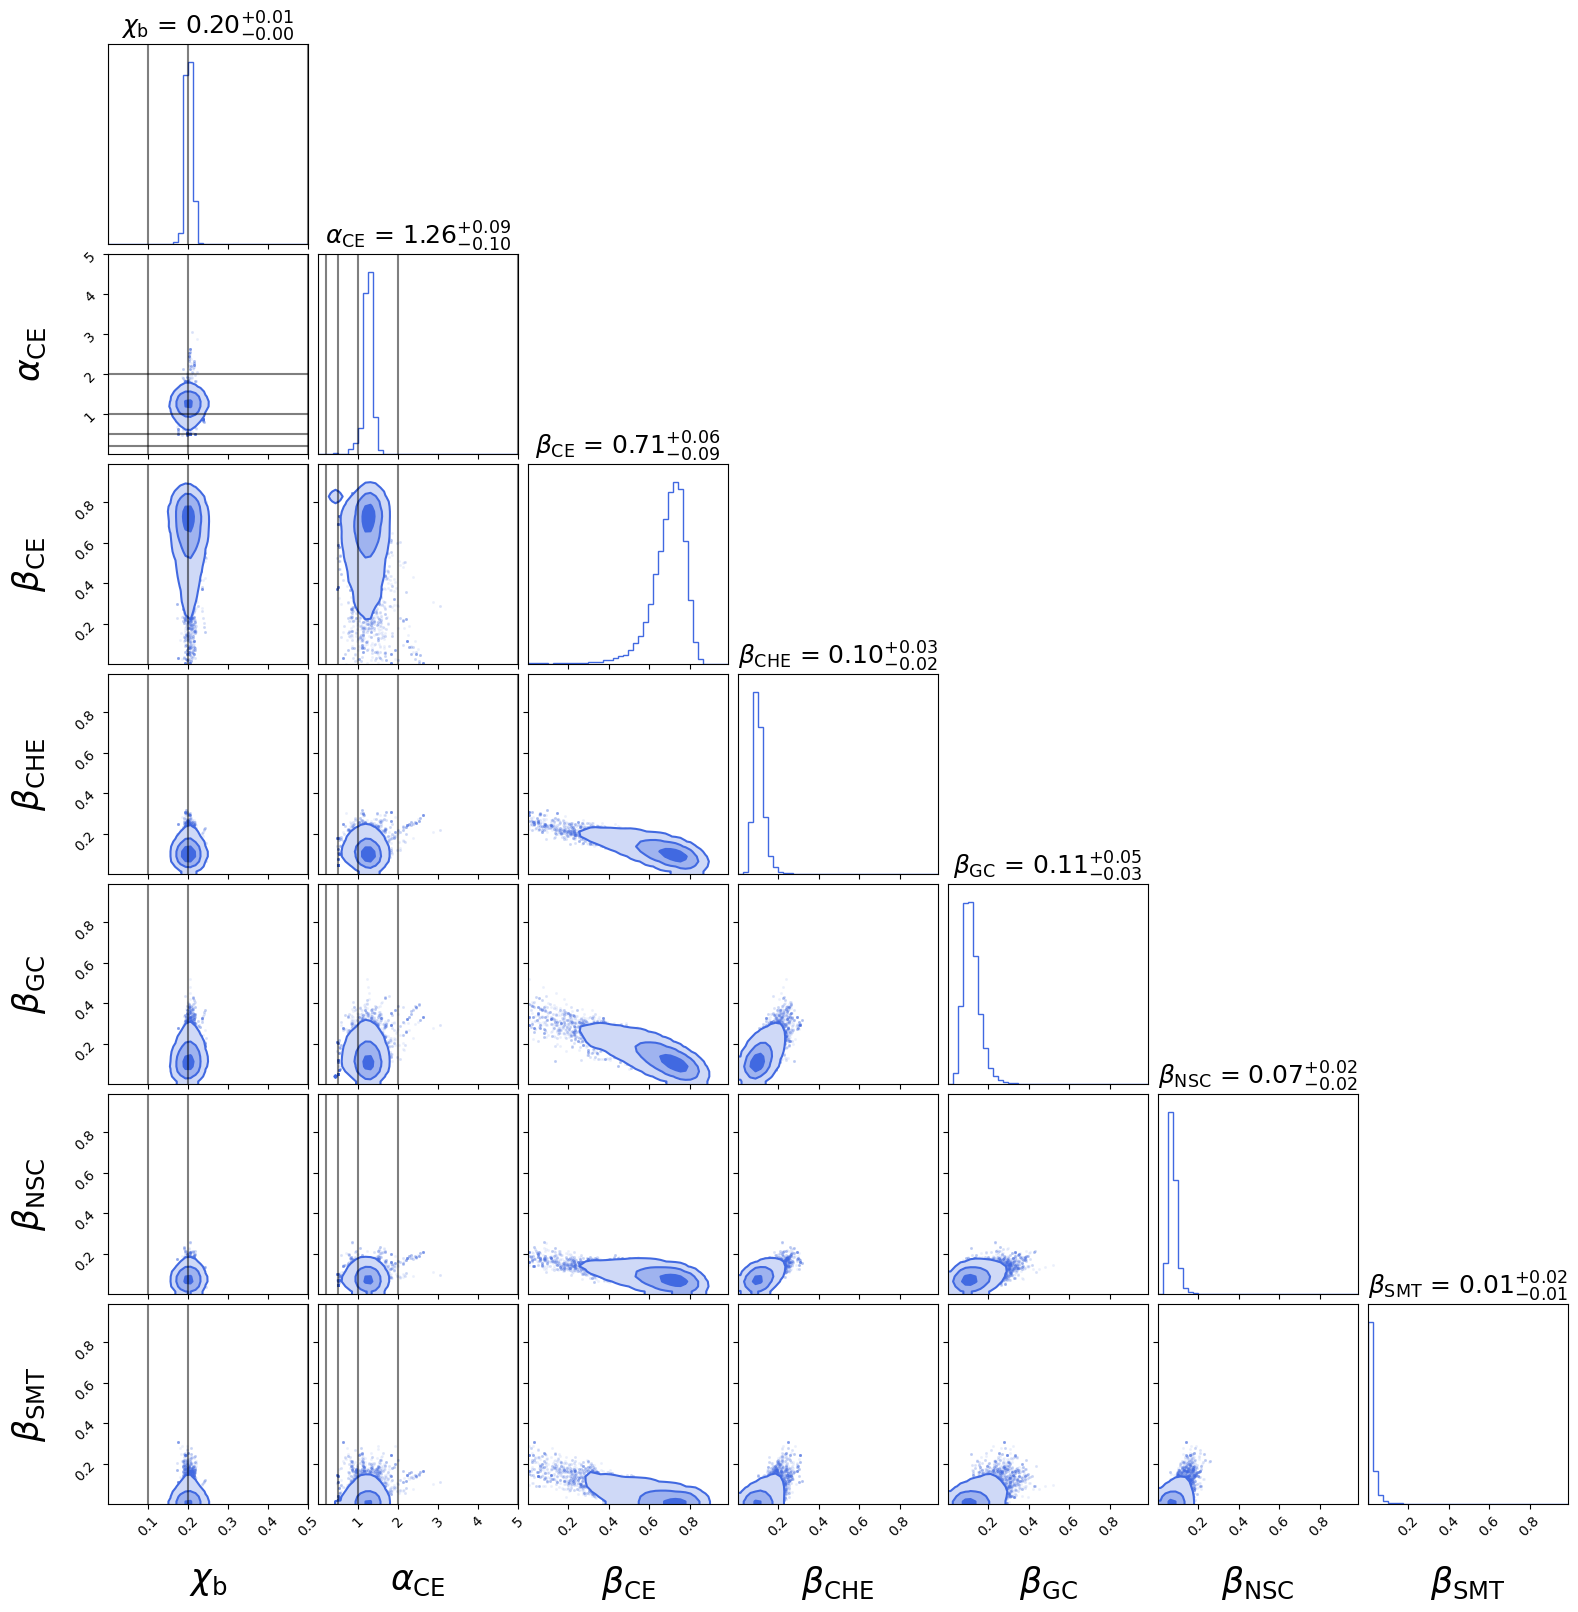

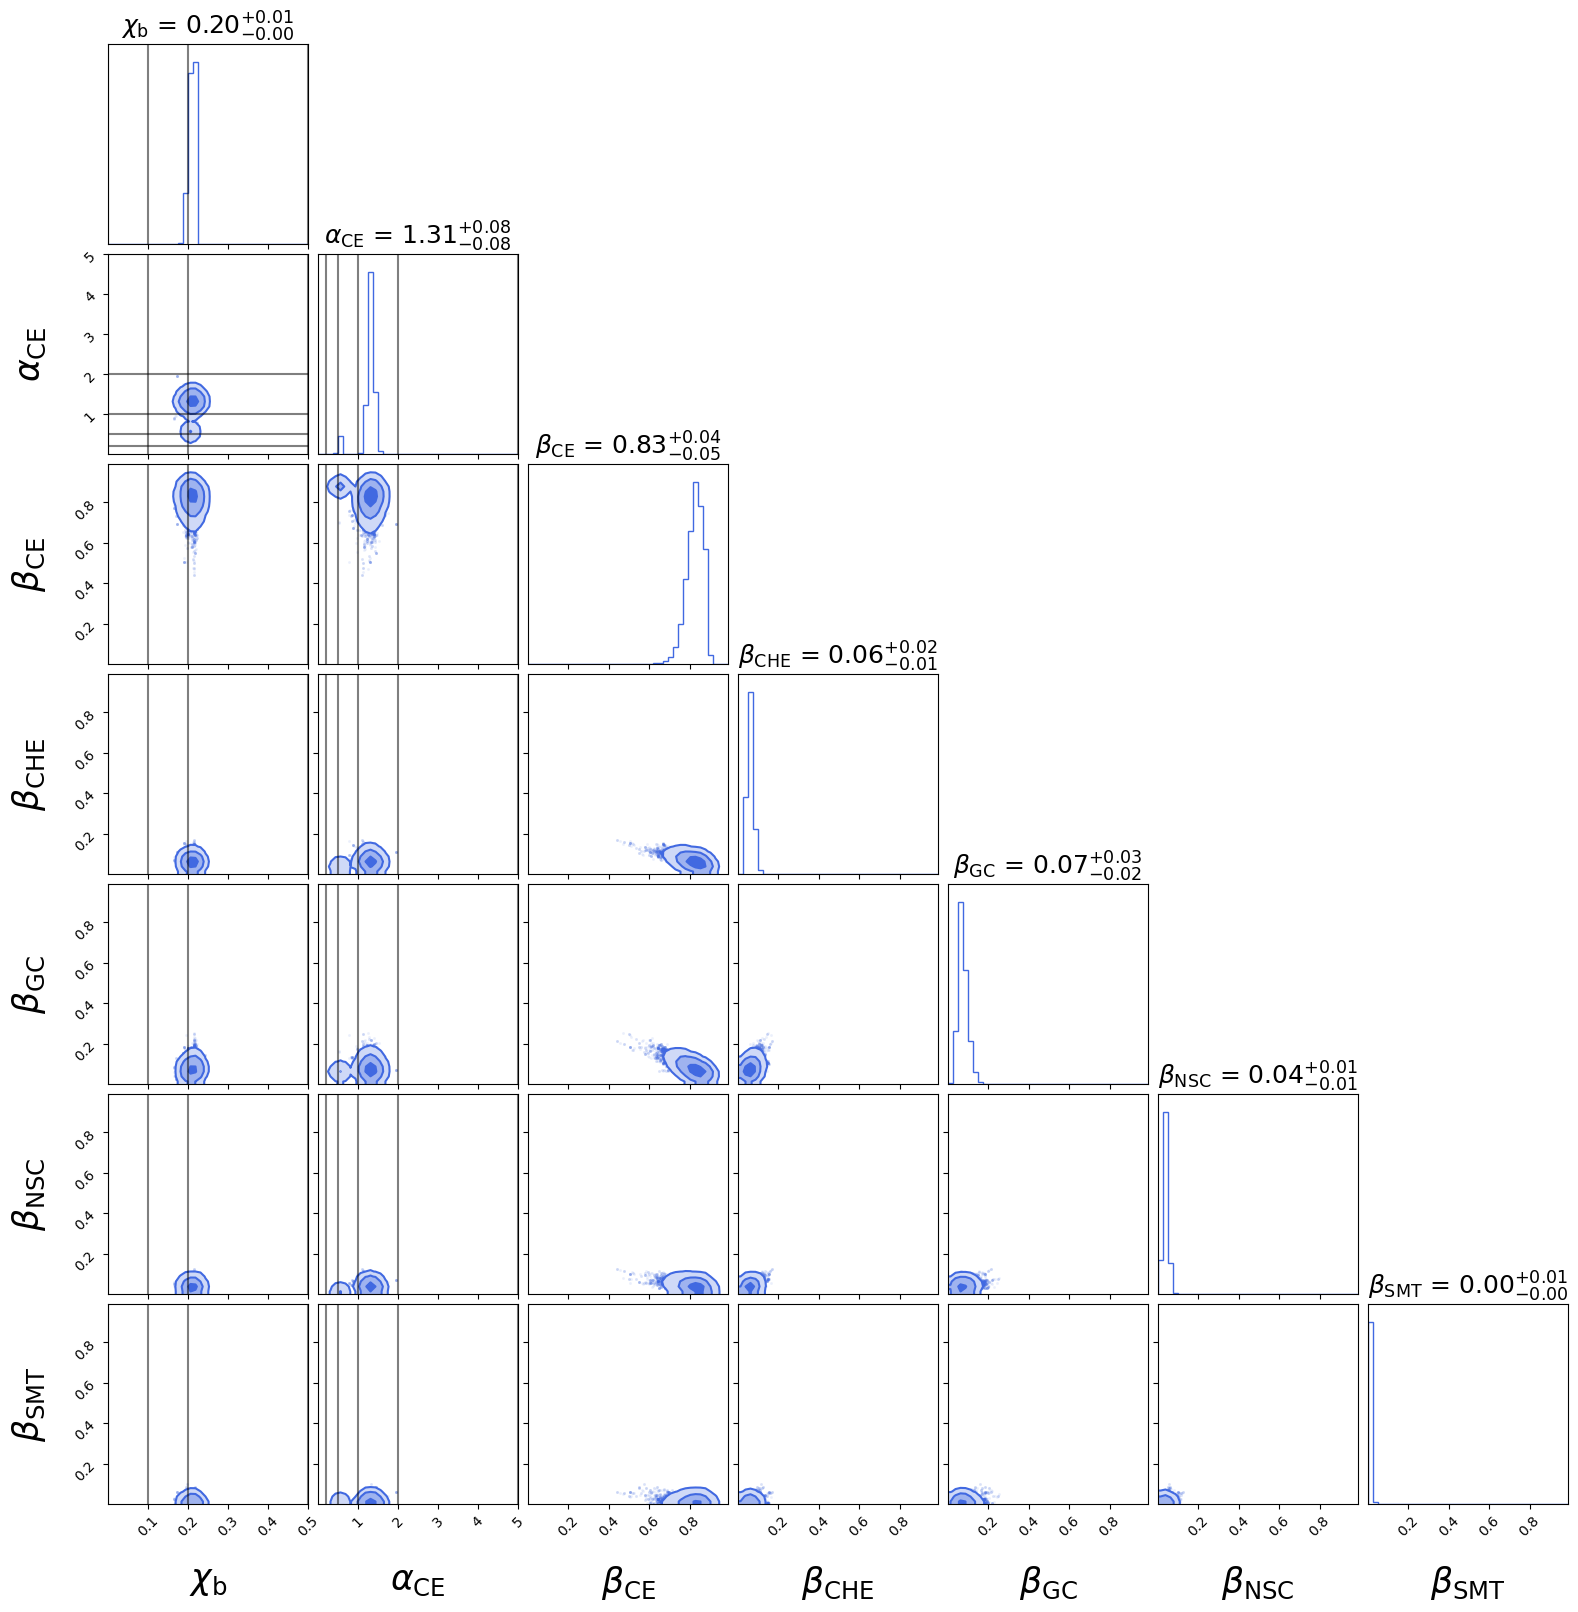

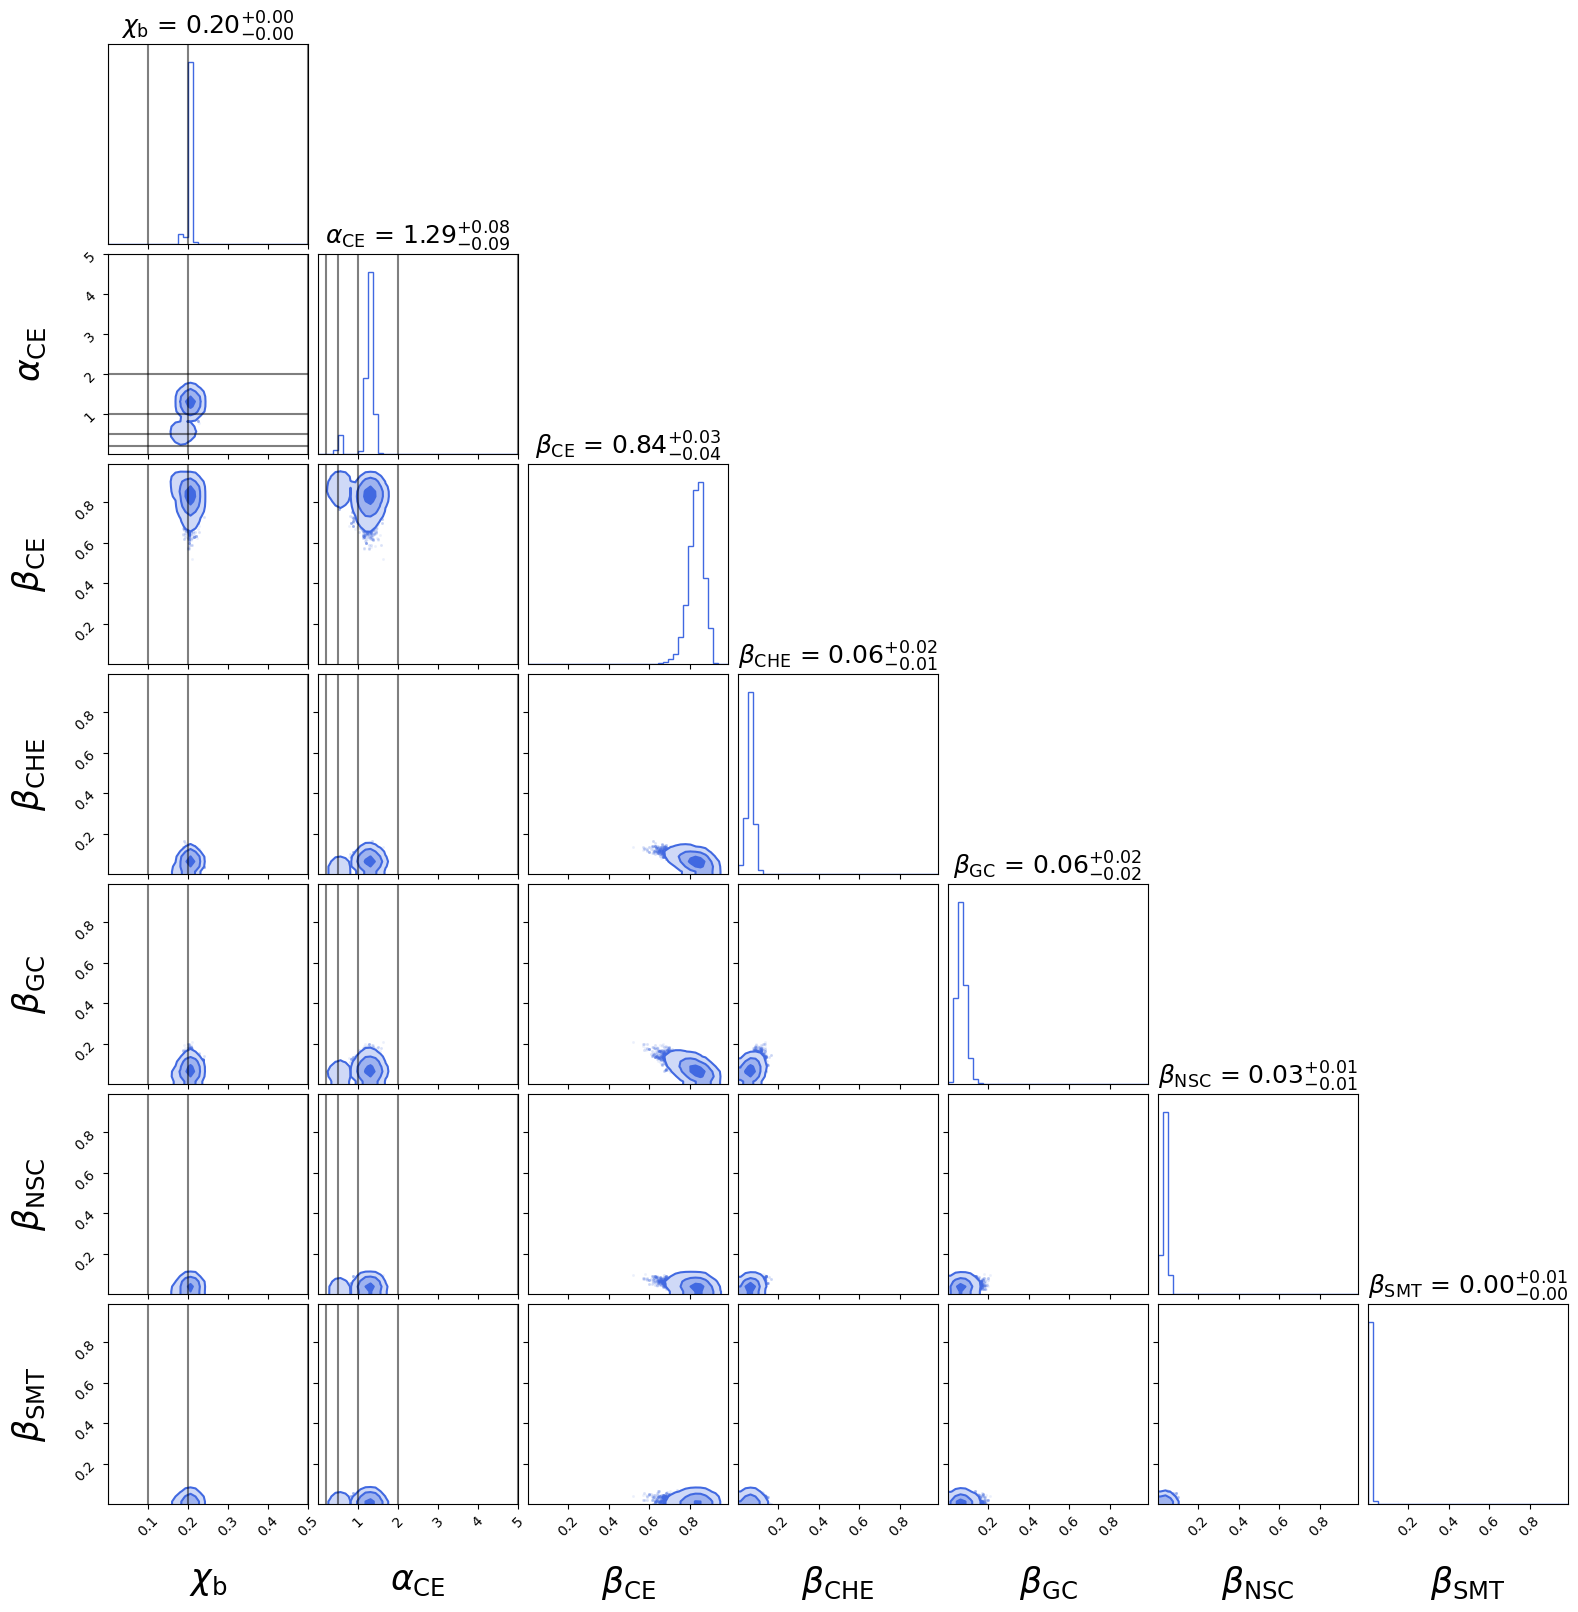

In [4]:
for i, filename in enumerate(glob.glob('/data/wiay/2297403c/amaze_model_select/AMAZE_model_selection/rns/Flows_080724_simevents_chib02/*.hdf5')):
    file = h5py.File(filename, 'r')
    branching_fracs = np.array(file['model_selection']['samples']['block0_values'])
    fig_seed = corner.corner(branching_fracs, **corner_kwargs)


    for xb in chi_b:
        corner.overplot_lines(fig_seed, [xb, None, None, None, None, None, None], color='black', alpha=0.5)

    for a in alpha:
        corner.overplot_lines(fig_seed, [None, a, None, None, None, None, None], color='black', alpha=0.5)

In [9]:
sys.path.append('../')

import populations.bbh_models as read_models
file_path='/data/wiay/2297403c/models_reduced.hdf5'
params = ['mchirp','q', 'chieff', 'z']
channels =['CE', 'CHE', 'GC', 'NSC', 'SMT']

model_names, flow = read_models.get_models(file_path, channels, params, use_flows=True, device='cpu',\
     no_bins=[5,4,4,5,4], sensitivity='midhighlatelow', use_unityweights=False)

/data/wiay/2297403c/conda_envs/amaze/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 5/5 [01:39<00:00, 19.81s/it]


In [10]:
file = h5py.File(f'/data/wiay/2297403c/amaze_model_select/AMAZE_model_selection/rns/Flows_250624_continuousgwtc3/output_seed12.hdf5', 'r')
branching_fracs = np.array(file['model_selection']['samples']['block0_values'])

channels =['CE', 'CHE', 'GC', 'NSC', 'SMT']


alphas = np.zeros((branching_fracs.shape[0], len(channels)))
#get alpha for 5 channels given chi_b, alpha_CE in each sample
for i, samp in enumerate(branching_fracs):
    for cidx, chnl in enumerate(channels):
        smdl = flow[chnl]
        if chnl == 'CE':
            alphas[i, cidx] = smdl.get_alpha([samp[:2]])
        else:
            alphas[i, cidx] = smdl.get_alpha([samp[:1][0], 1.])

converted_betas = branching_fracs[:,2:] * alphas
#divide by sum across channels
converted_betas /= converted_betas.sum(axis=1, keepdims=True)

/tmp/ipykernel_142226/1921481415.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alphas[i, cidx] = smdl.get_alpha([samp[:2]])
/tmp/ipykernel_142226/1921481415.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alphas[i, cidx] = smdl.get_alpha([samp[:1][0], 1.])


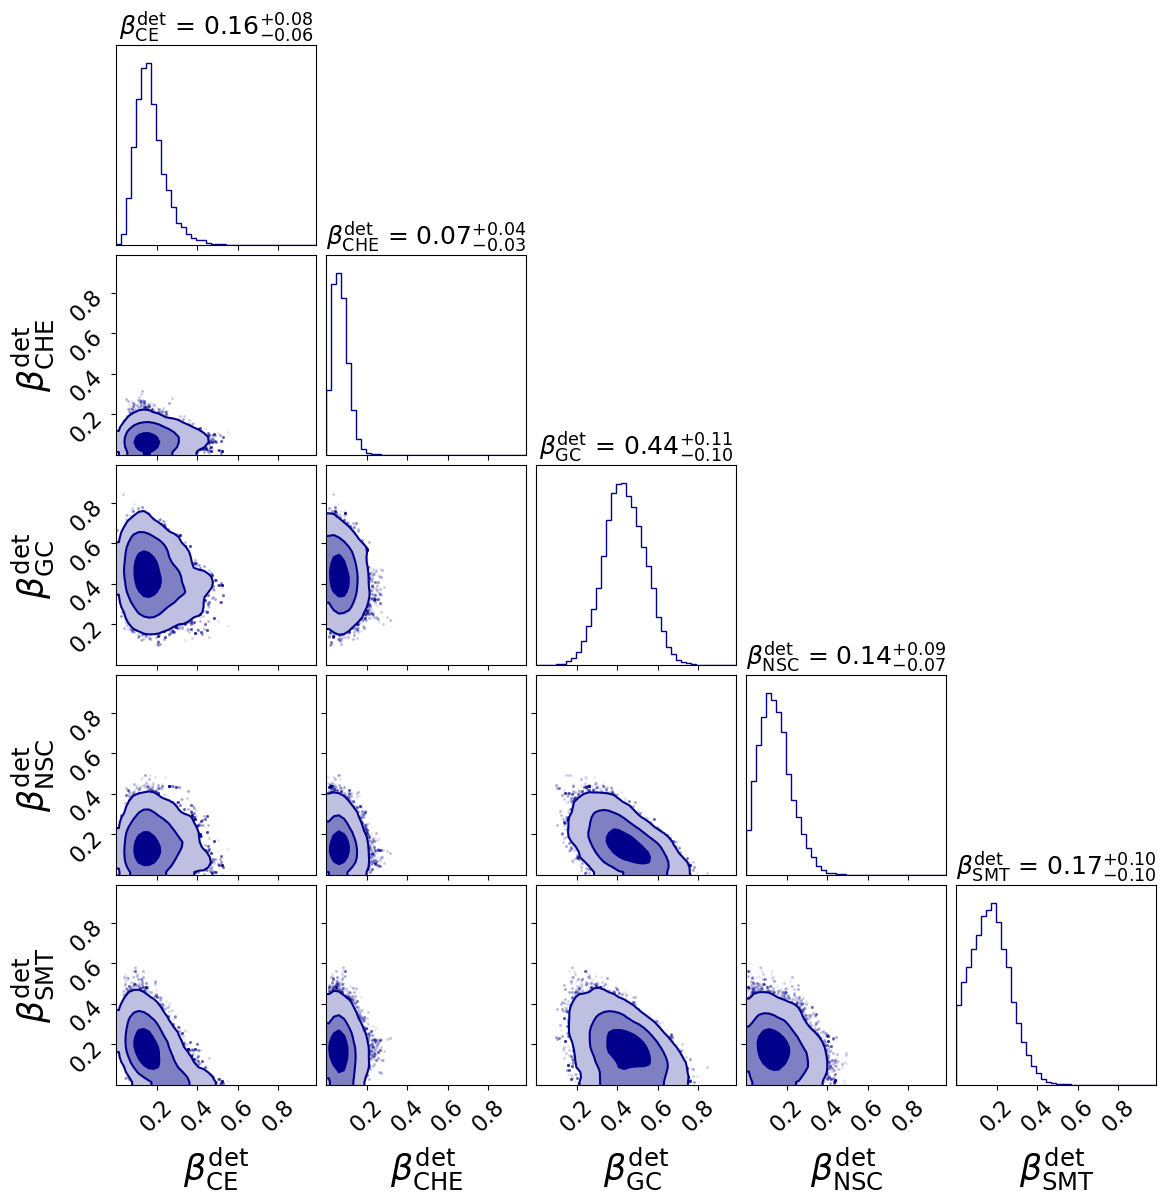

In [12]:
corner_kwargs = dict(
    bins=40,
    smooth=0.9,
    color="darkblue",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=True,
    hist_kwargs=dict(density=True),
    label_kwargs=dict(fontsize=25),
    title_kwargs=dict(fontsize=18),
    labels=[r'$\beta_{\mathrm{CE}}^{\mathrm{det}}$',r'$\beta_{\mathrm{CHE}}^{\mathrm{det}}$',r'$\beta_{\mathrm{GC}}^{\mathrm{det}}$',r'$\beta_{\mathrm{NSC}}^{\mathrm{det}}$',r'$\beta_{\mathrm{SMT}}^{\mathrm{det}}$'],
    #labels=[r'$\alpha_CE$',r'$\Beta_CE$',r'$\Beta_CHE$',r'$\Beta_GC$',r'$\Beta_NSC$',r'$\Beta_SMT$'],
    range = [(0.,.99),(0.,.99),(0.,.99),(0.,.99),(0.,.99)]
)
fig_data = corner.corner(converted_betas, **corner_kwargs)